In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
blue = '#1f77b4'

In [3]:
# graph style
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
fig_height = 4
fig_width = 6

# Actual traces

In [4]:
def load_and_plot_npy(device,source,archi=None,plot_func=None):
    t_dataset = np.load(trace_path_format.format(device,source,'X'))
    d_dataset = np.load(trace_path_format.format(device,source,'Y'))
    plot_func(t_dataset,d_dataset)

In [5]:
from analysis.standalone_characterizations import SNR
#from intermediates import *
def plot_snr_npy(device,sources,archi,save=False):
    
    def plotting(t_dataset,d_dataset):
        snr = SNR(700,prediction=lambda x: x)#SBOX_OUT(2))
        for i in range(t_dataset.shape[0]):
            snr.add_curve(t_dataset[i],d_dataset[i])
        ax.plot(snr.get_result(),linestyle='-',color=blue)
        ax.set_xlabel('sample points')
        ax.set_ylabel('SNR')
        #ax.set_ylim(0,55)
        ax.set_ylim(0,10**5)
    
    for i , source in enumerate(sources):
        fig = plt.figure(figsize=(fig_width, fig_height))
        plt.yscale("log")
        ax = plt.gca()
        source = source.split('_')[0]
        print('STM32 {} ({})'.format(device,source))
        #ax.set_title('STM32 {} ({})'.format(device,source))
        
        load_and_plot_npy(device,source.upper(),archi,plotting)
        if save:
            if 'fake' in source:
                plt.savefig('../figures/fake_{}to{}{}_snr4.png'.format(archi.lower(),device.lower(),source.lower()),bbox_inches='tight')
            else:
                plt.savefig('../figures/real_{}{}_snr4.png'.format(device.lower(),source.lower()),bbox_inches='tight')
    if not save:
        plt.show()

In [6]:
# device / source / type
trace_path_format = '/mnt/SCA1/CARDIS/data_gan/stm32/translate/data/08B{}{}/SNR4/700/minmax/{}_attack.npy'

STM32 F0 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F0 (em)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F1 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F1 (em)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F2 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F2 (em)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F3 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F3 (em)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F4 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


STM32 F4 (em)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


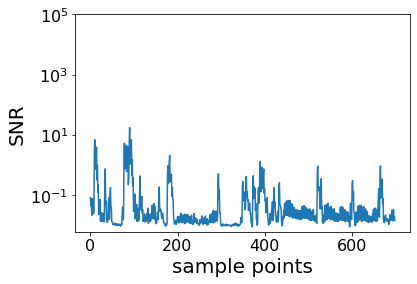

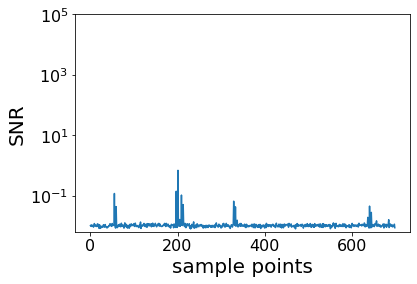

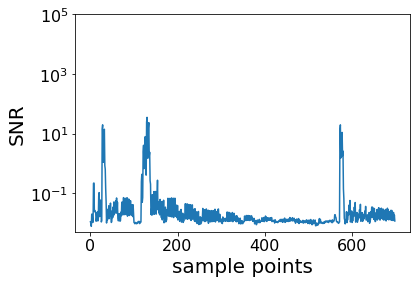

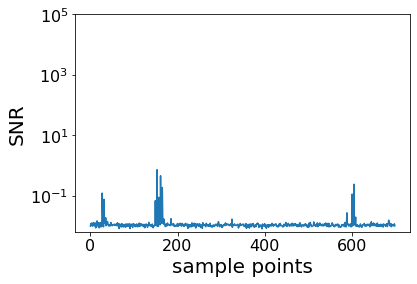

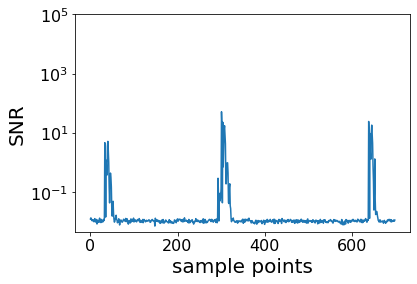

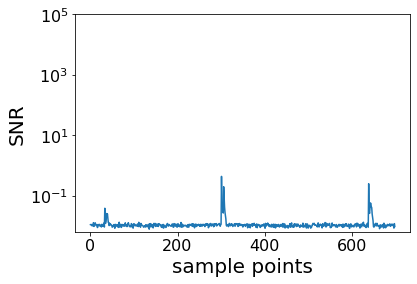

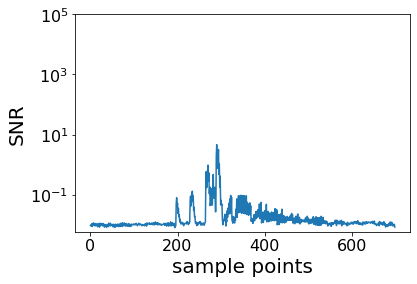

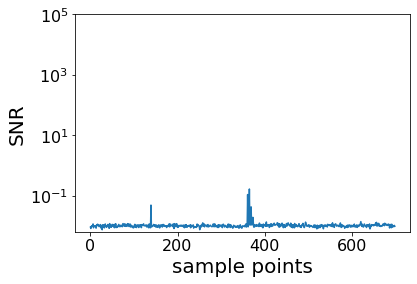

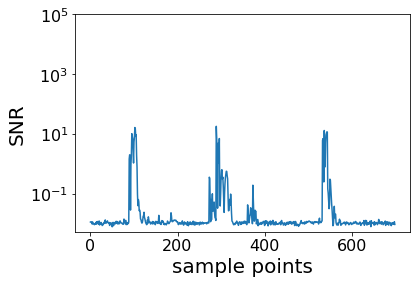

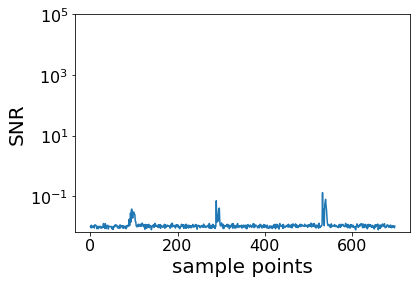

In [7]:
for device in ('F0','F1','F2','F3','F4'):
        plot_snr_npy(device,('pw','em'),None,save=True)
#plot_snr_npy('NANO',('pw',),None,save=True)

# Fake traces

In [8]:
# from / to source / to channel
fake_path_format = "/mnt/SCA1/CARDIS/script/fake_data/fake_08B{}+08B{}{}.h5"

In [9]:
def load_and_plot_h5(device,source,from_domain,plot_func):
    file_in = h5py.File(fake_path_format.format(from_domain,device,source),'r')
    t_dataset = file_in['FAKE/traces_08B{}'.format(from_domain)]
    d_dataset = file_in['FAKE/data']
    plot_func(t_dataset,d_dataset)
    file_in.close()

In [14]:
from analysis.standalone_characterizations import SNR
from intermediates import *
def plot_snr_h5(device,source,from_domain,save=False):
    fig = plt.figure(figsize=(fig_width, fig_height))
    plt.yscale("log")
    ax = plt.gca()
    print('STM32 {} ({})'.format(device,source))
    #ax.set_title('STM32 {} ({})'.format(device,source))
    
    def plotting(t_dataset,d_dataset):
        snr = SNR(700,prediction=SBOX_OUT(2))
        for i in range(t_dataset.shape[0]):
            snr.add_curve(t_dataset[i],d_dataset[i])
        ax.plot(snr.get_result(),linestyle='-',color=blue)
        ax.set_xlabel('sample points')
        ax.set_ylabel('SNR')
        #ax.set_ylim(0,55)
        ax.set_ylim(0,10**5)
        
    load_and_plot_h5(device,source.upper(),from_domain.upper(),plotting)
    if save:
        plt.savefig('../figures/fake_{}to{}{}_snr4.png'.format(from_domain.lower(),device.lower(),source.lower()),bbox_inches='tight')
    else:
        plt.show()

## EM to PW

STM32 F0 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


STM32 F1 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


STM32 F2 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


STM32 F3 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


STM32 F4 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


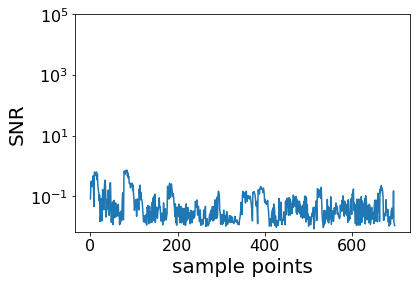

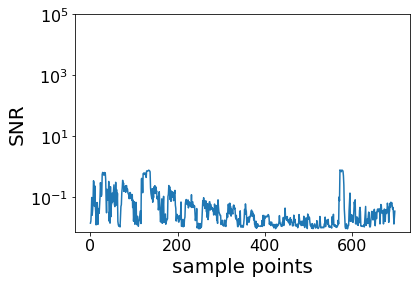

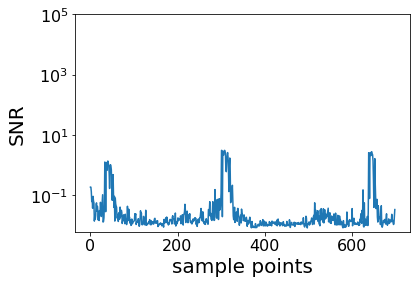

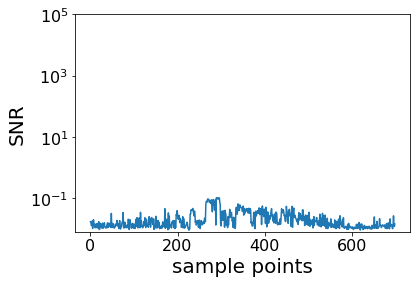

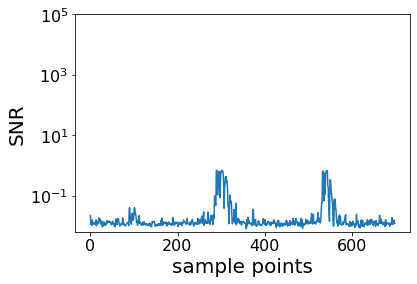

In [15]:
for device in ('F0','F1','F2','F3','F4'):
    plot_snr_h5(device,'pw','{}em'.format(device),save=True)

## Cross-device

### STM32FX

STM32 F4 (pw)


/home/lab/venvs/scal_dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


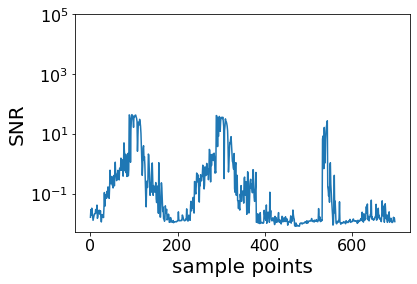

In [18]:
for device_from in ('F2',):
    for device_to in ('F4',):
        if device_from == device_to: continue
        plot_snr_h5(device_to,'pw','{}pw'.format(device_from),save=True)

### NANO

In [ ]:
for device_from in ('NANO',):
    for device_to in ('F2','F4'):
        if device_from == device_to: continue
        plot_snr_h5(device_to,'pw','{}pw'.format(device_from),save=True)


### F3EM to F2PW

In [ ]:
for device_from in ('F3',):
    for device_to in ('F2',):
        if device_from == device_to: continue
        plot_snr_h5(device_to,'pw','{}em'.format(device_from),save=True)


## New

plot_snr_h5 : device_to, channel_to, domain_from

In [ ]:
plot_snr_h5('F4','pw','f2pw',save=True)
plot_snr_h5('F2','pw','f0pw',save=True)
plot_snr_h5('F0','pw','f4pw',save=True)
plot_snr_h5('F2','pw','f1pw',save=True)